# Matrix decomposition

### Problem 0

Generate random matrix of a reasonable size, perform SVD decomposition, obtain initial matrix from it, calculate the error.

In [1]:
import numpy as np
import scipy.linalg as la

In [3]:
X = np.random.random((4,6))
print(X)

[[0.56436545 0.75061719 0.90570067 0.22914286 0.48478366 0.48322069]
 [0.90670003 0.13256843 0.90229762 0.36311071 0.35956859 0.65535736]
 [0.09983532 0.08409863 0.67757743 0.91417614 0.27257392 0.75934158]
 [0.03007795 0.85974592 0.20758489 0.31075764 0.22516112 0.0050684 ]]


In [5]:
U,s,Vh = la.svd(X)

In [6]:
print(U.shape, s.shape, Vh.shape)

(4, 4) (4,) (6, 6)


In [8]:
Y = U @ np.hstack((np.diag(s), np.zeros((U.shape[0],Vh.shape[0]-U.shape[1])))) @ Vh

In [10]:
print(np.max(np.abs(Y-X)))

7.771561172376096e-16


### Problem 1
Load *rocket* image from scikit-image library (make sure you're working with normalized pixel values):

`from skimage import data
from skimage.color import rgb2gray
img = data.rocket()
gr_img = rgb2gray(img)`

Perform SVD decomposition, try restoring the image with $1, 2, \ldots, k$ singular vectors, check at which $k$ the restored result is reasonably good. Calculate the reduction in necessary storage for the image compared to the original image. Then try performing the same process with colored version separately for each channel (same $k$ for every channel, different $k$ for every channels). Try the same for *chelsea* image: which image takes more data to restore to the tolerable quality?

In [13]:
import numpy as np
import scipy.linalg as la
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
#matplotlib inline

In [12]:
img = data.rocket()
gr_img = rgb2gray(img)

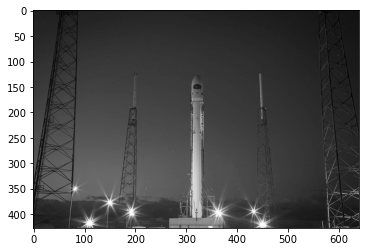

In [16]:
plt.imshow(gr_img, cmap='gray')
plt.show()

In [22]:
U, s, Vh = la.svd(gr_img, full_matrices=False)

In [23]:
print(U.shape, s.shape, Vh.shape)

(427, 427) (427,) (427, 640)


1


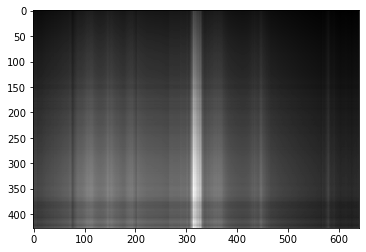

2


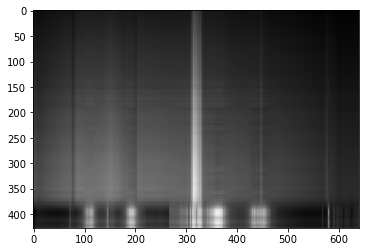

3


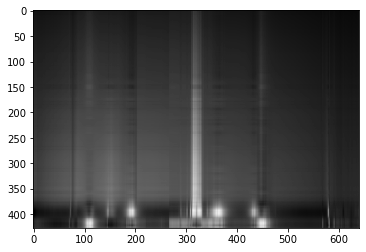

4


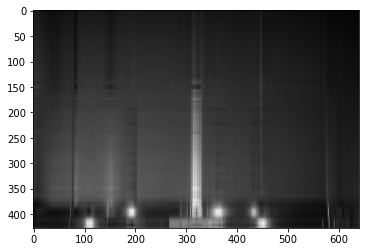

5


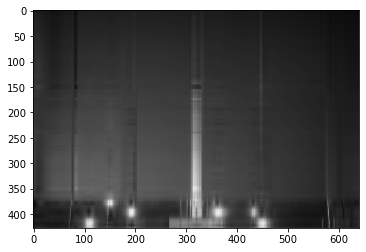

6


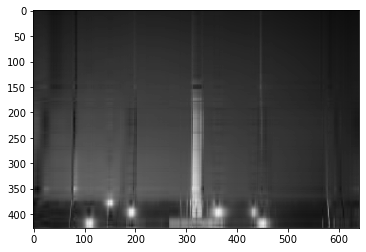

7


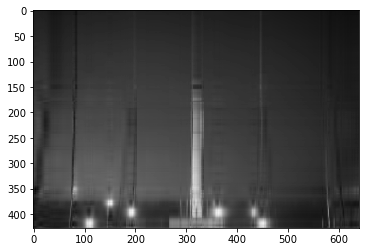

8


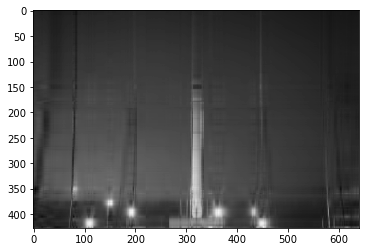

9


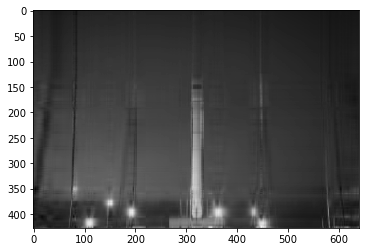

10


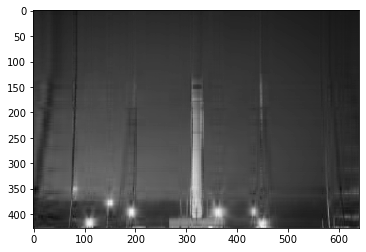

11


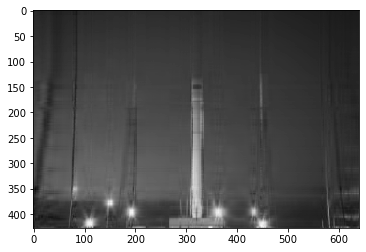

12


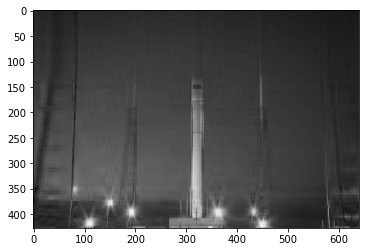

13


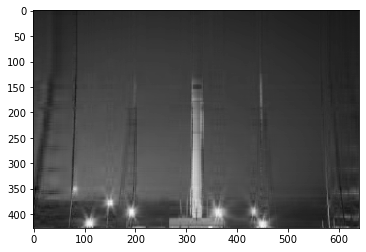

14


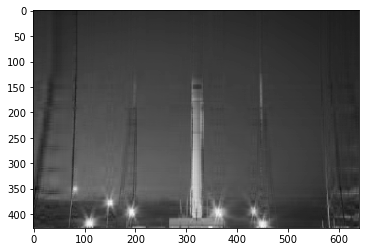

15


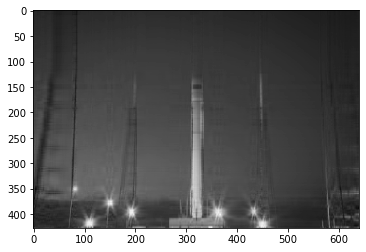

16


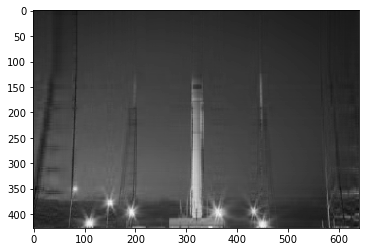

17


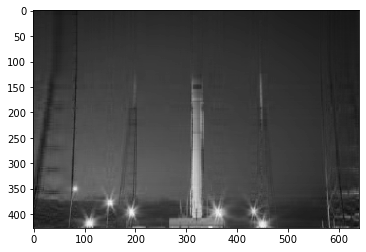

18


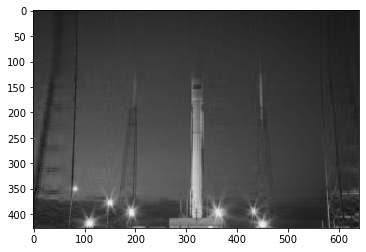

19


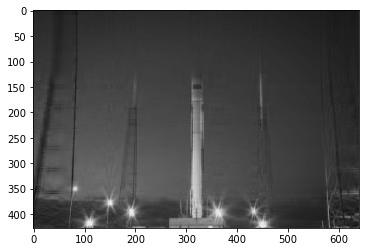

In [25]:
for k in range(1, 20):
    s_new = np.zeros(s.shape)
    s_new[:k] = s[:k]
    img_restored = U @ np.diag(s_new) @ Vh
    print(k)
    plt.imshow(img_restored, cmap='gray')
    plt.show()

In [30]:
print('Raw data: ', gr_img.size)
print('20 singular values: ', (U.shape[0]+Vh.shape[1]+1)*20*4)

Raw data:  273280
20 singular values:  85440


(427, 640, 3)


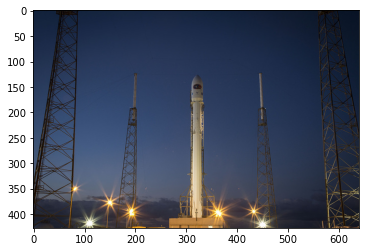

In [31]:
print(img.shape)
plt.imshow(img)
plt.show()

In [37]:
img = img/255.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


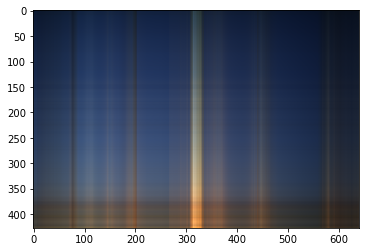

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


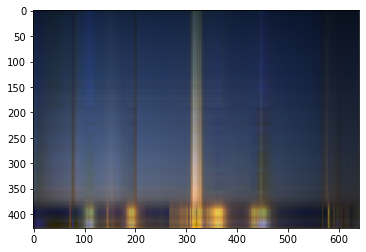

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


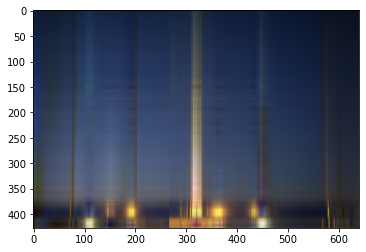

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


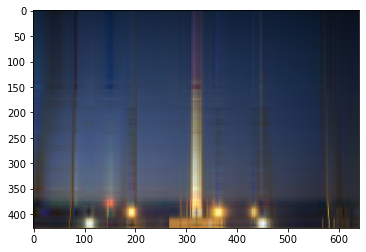

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


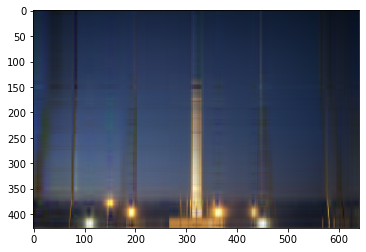

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


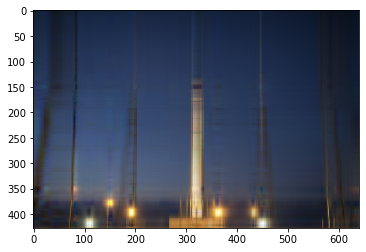

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7


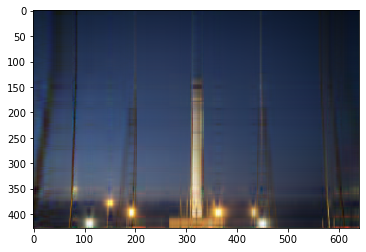

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


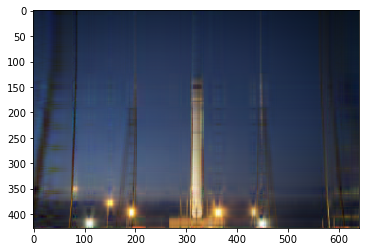

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9


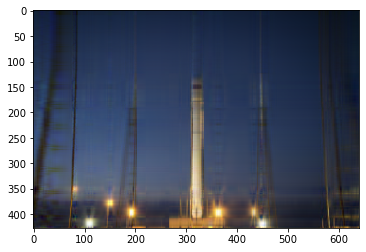

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10


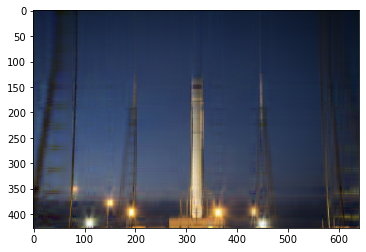

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11


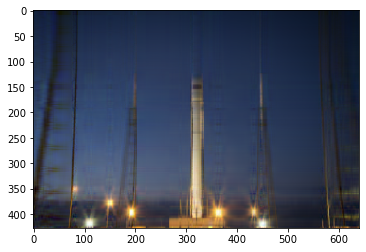

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


12


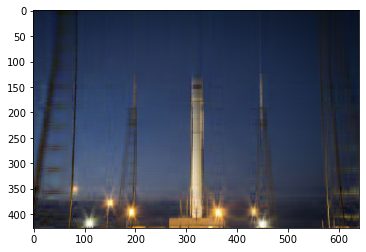

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


13


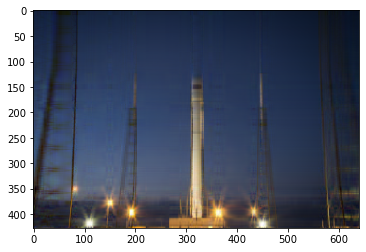

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


14


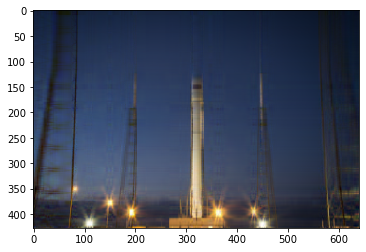

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15


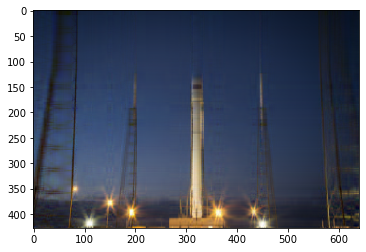

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


16


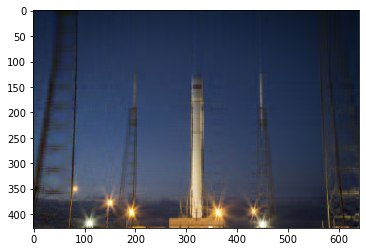

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


17


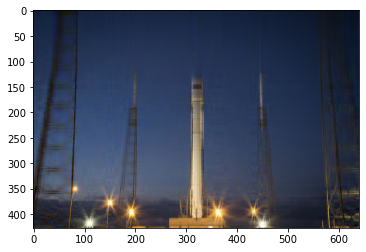

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


18


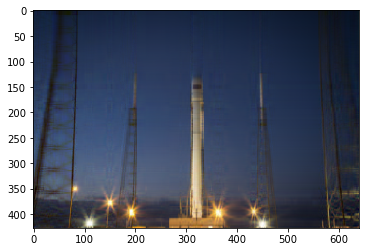

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


19


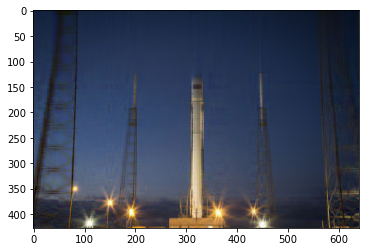

In [38]:
for k in range(1, 20):
    img_restored = np.zeros(img.shape)
    for ch in range(3):
        U, s, Vh = la.svd(img[:,:,ch], full_matrices=False)
        s_new = np.zeros(s.shape)
        s_new[:k] = s[:k]
        img_restored[:,:,ch] = U @ np.diag(s_new) @ Vh
    print(k)
    plt.imshow(img_restored)
    plt.show()

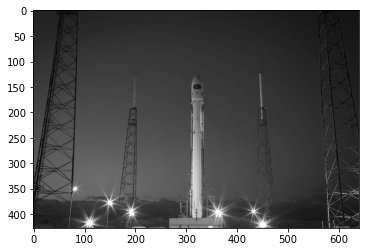

In [43]:
plt.imshow(img[:,:,1], cmap='gray')
plt.show()

### Problem 2
Load *digits* dataset:

`from sklearn.datasets import load_digits
digits = load_digits()`

Perform SVD on the data, inspect the singular values, try reconstructing the data with some fixed number of singular vectors, check the visual quality of the reconstruted samples. Try the same with a subset of images corresponding to a specific digit of your choice - how many singular vectors you need for similar quality of reconstriction?

In [46]:
import sklearn.datasets as ds
help(ds.load_digits)

Help on function load_digits in module sklearn.datasets._base:

load_digits(*, n_class=10, return_X_y=False, as_frame=False)
    Load and return the digits dataset (classification).
    
    Each datapoint is a 8x8 image of a digit.
    
    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============
    
    Read more in the :ref:`User Guide <digits_dataset>`.
    
    Parameters
    ----------
    n_class : int, default=10
        The number of classes to return. Between 0 and 10.
    
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    as_frame : bool, default=False
        If True, the data is a pandas